In [58]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [3]:
data = pd.read_csv("./asthma_disease_data.csv");
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [4]:
data.shape

(2392, 29)

In [5]:
data.isna().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.drop(columns='PatientID', inplace=True)

In [9]:
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [10]:
data['DoctorInCharge'].value_counts()

DoctorInCharge
Dr_Confid    2392
Name: count, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

In [14]:
ethnicity_counts = data['Ethnicity'].value_counts()
ethnicity_labels = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

In [17]:
fig = px.pie(data_frame=data, names=ethnicity_labels, values=ethnicity_counts.values)
fig.show()

In [18]:
edu_level_counts = data['EducationLevel'].value_counts()
edu_level_labels = {
    0: 'None',
    1: 'High School',
    2: "Bachelor's",
    3: "Higher"
}

In [19]:
fig = px.pie(data_frame=data, names=edu_level_labels, values=edu_level_counts.values)
fig.show()

In [20]:
data['Diagnosis'].value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [39]:
diagnosis_counts = data['Diagnosis'].value_counts().reset_index()
diagnosis_counts.columns = ['Diagnosis', 'Count']


fig = px.bar(diagnosis_counts, x='Diagnosis', y='Count', color='Diagnosis', title='Counts of Diagnoses')


fig.update_layout(
    xaxis_title='Diagnosis',
    yaxis_title='Count',
    bargap=0.2 )

fig.show()



C:\Users\muham\AppData\Local\Temp\ipykernel_11324\362838892.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



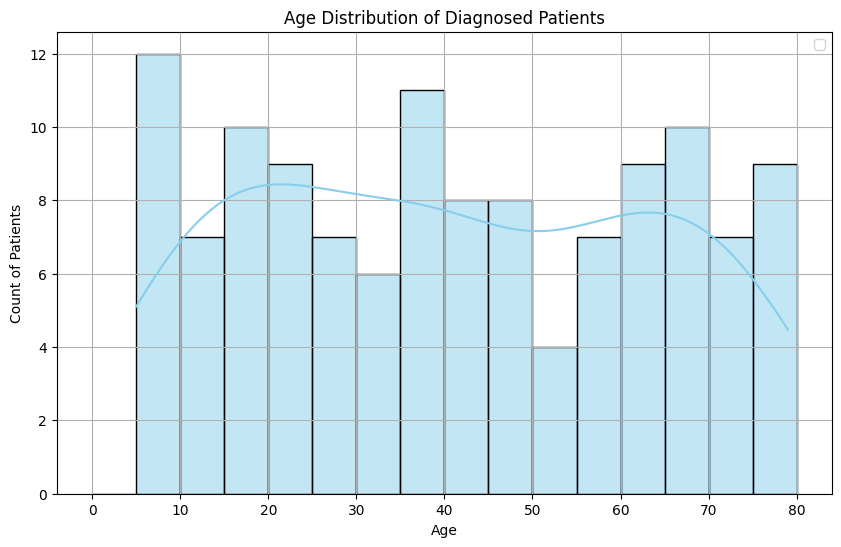

In [27]:
age_dianoised = data[data['Diagnosis'] == 1]['Age']
plt.figure(figsize=(10, 6))
sns.histplot(data=age_dianoised, bins=range(0, 85, 5), kde=True, color='skyblue')
plt.title('Age Distribution of Diagnosed Patients')
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.legend()
plt.grid(True)

In [30]:
gender_count = data['Gender'].value_counts()

In [37]:
gender_counts = data['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

fig = px.bar(gender_counts, x='Gender', y='Count', title='Counts of Gender', color='Gender')

fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Count',
    bargap=0.2 )

fig.show()


### Outlier Detection

In [41]:
# z = x - u/std

In [42]:
data_copy = data.copy()

In [43]:
for i in data.columns:
    if data_copy[i].dtype != 'object':
        z_score = (data_copy[i] - data_copy[i].mean())/data_copy[i].std()
        data_copy['z_score'] = z_score
        no_outliers = data_copy[((data_copy['z_score'] > -3) & (data_copy['z_score'] < 3))]

In [44]:
data_copy.drop(columns='z_score', inplace=True)

In [45]:
data_copy.shape, data.shape

((2392, 28), (2392, 28))

In [49]:
data.drop(columns='DoctorInCharge', inplace=True, axis=1)

In [50]:
X = data.drop(columns='Diagnosis')
y = data['Diagnosis']

In [51]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [53]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1913, 26), (1913,), (479, 26), (479,))

In [56]:
models = {
        'Logistic Regression' :LogisticRegression(),
        'SVC': SVC(probability=True),
        'Gradient Boosting Classifier': GradientBoostingClassifier(),
        'XGB Classifier': XGBClassifier(),
        'K Neighbors Classifier': KNeighborsClassifier(),
        'Random Forest Classifier':RandomForestClassifier()
}

In [59]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")
    print("\n")

Model: Logistic Regression
Accuracy: 0.9519832985386222
ROC AUC: 0.5225019069412662


Model: SVC
Accuracy: 0.9519832985386222
ROC AUC: 0.5128718535469108


Model: Gradient Boosting Classifier
Accuracy: 0.9498956158663883
ROC AUC: 0.44174294431731503


Model: XGB Classifier
Accuracy: 0.9519832985386222
ROC AUC: 0.4032227307398932


Model: K Neighbors Classifier
Accuracy: 0.9519832985386222
ROC AUC: 0.5402364607170098


Model: Random Forest Classifier
Accuracy: 0.9519832985386222
ROC AUC: 0.3924485125858123


